# Import Python Libraries

In [495]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression,  ElasticNet, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV 
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
# Deskewing
import scipy.stats as stats

###### 1. Gathering data/Cleaning data:

2. Exploratory Data Analysis: refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

3. Feature engineering/selection: Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. Feature engineering turn your inputs into things the algorithm can understand.

4. Defining model.
5. Training, testing model and predicting the output.

# Objective

We will create a regression model based on the Ames Housing Dataset. This model will predict the price of a house at sale. The Ames Housing Dataset is an exceptionally detailed and robust dataset with over 70 columns of different features relating to houses. The objectives are:

1. Creating and iteratively refining a regression model
2. Using Kaggle to practice the modeling process
3. Providing business insights through reporting and presentation.

Secondly, the model generated will be used for a competition on Kaggle to showcase:

1. Refining models over time
2. Use of train-test split, cross-validation, and data with unknown values for the target to simulate the modeling process
3. The use of Kaggle as a place to practice data science

# 1.0. Data Loading and Inspection

In [496]:
train_df = pd.read_csv('/Users/macbook/Google Drive/0. Ofilispeaks Business (Mac and Cloud)/9. Data Science/0. Python/General Assembly Training/project_2-master/datasets/train.csv')
test_df = pd.read_csv ('/Users/macbook/Google Drive/0. Ofilispeaks Business (Mac and Cloud)/9. Data Science/0. Python/General Assembly Training/project_2-master/datasets/test.csv')

In [497]:
# View the training data
train_df.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [498]:
# Arrange columns in alphabetical orders for easier navigation
train_df = train_df.reindex(sorted(train_df.columns), axis=1)
# Reference https://stackoverflow.com/questions/11067027/re-ordering-columns-in-pandas-dataframe-based-on-column-name

In [499]:
# Get numeric understanding of the Data
train_df.describe()

1st Flr SF   2nd Flr SF   3Ssn Porch  Bedroom AbvGr  Bsmt Full Bath  \
count  2051.000000  2051.000000  2051.000000    2051.000000     2049.000000   
mean   1164.488055   329.329108     2.591419       2.843491        0.427526   
std     396.446923   425.671046    25.229615       0.826618        0.522673   
min     334.000000     0.000000     0.000000       0.000000        0.000000   
25%     879.500000     0.000000     0.000000       2.000000        0.000000   
50%    1093.000000     0.000000     0.000000       3.000000        0.000000   
75%    1405.000000   692.500000     0.000000       3.000000        1.000000   
max    5095.000000  1862.000000   508.000000       8.000000        3.000000   

       Bsmt Half Bath  Bsmt Unf SF  BsmtFin SF 1  BsmtFin SF 2  \
count     2049.000000  2050.000000   2050.000000   2050.000000   
mean         0.063446   567.728293    442.300488     47.959024   
std          0.251705   444.954786    461.204124    165.000901   
min          0.000000     0.000000      0.000000      0.000000   
25%          0.000000   220.000000      0.000000      0.000000   
50%          0.000000   474.500000    368.000000      0.000000   
75%          0.000000   811.000000    733.750000      0.000000   
max          2.000000  2336.000000   5644.000000   1474.000000   

       Enclosed Porch  ...           PID    Pool Area      SalePrice  \
count     2051.000000  ...  2.051000e+03  2051.000000    2051.000000   
mean        22.571916  ...  7.135900e+08     2.397855  181469.701609   
std         59.845110  ...  1.886918e+08    37.782570   79258.659352   
min          0.000000  ...  5.263011e+08     0.000000   12789.000000   
25%          0.000000  ...  5.284581e+08     0.000000  129825.000000   
50%          0.000000  ...  5.354532e+08     0.000000  162500.000000   
75%          0.000000  ...  9.071801e+08     0.000000  214000.000000   
max        432.000000  ...  9.241520e+08   800.000000  611657.000000   

       Screen Porch  TotRms AbvGrd  Total Bsmt SF  Wood Deck SF   Year Built  \
count   2051.000000    2051.000000    2050.000000   2051.000000  2051.000000   
mean      16.511458       6.435885    1057.987805     93.833740  1971.708922   
std       57.374204       1.560225     449.410704    128.549416    30.177889   
min        0.000000       2.000000       0.000000      0.000000  1872.000000   
25%        0.000000       5.000000     793.000000      0.000000  1953.500000   
50%        0.000000       6.000000     994.500000      0.000000  1974.000000   
75%        0.000000       7.000000    1318.750000    168.000000  2001.000000   
max      490.000000      15.000000    6110.000000   1424.000000  2010.000000   

       Year Remod/Add      Yr Sold  
count     2051.000000  2051.000000  
mean      1984.190151  2007.775719  
std         21.036250     1.312014  
min       1950.000000  2006.000000  
25%       1964.500000  2007.000000  
50%       1993.000000  2008.000000  
75%       2004.000000  2009.000000  
max       2010.000000  2010.000000  

[8 rows x 39 columns]

In [500]:
# Describing all the Categorical Features
train_df.describe(include='all')

1st Flr SF   2nd Flr SF   3Ssn Porch Alley  Bedroom AbvGr Bldg Type  \
count   2051.000000  2051.000000  2051.000000   140    2051.000000      2051   
unique          NaN          NaN          NaN     2            NaN         5   
top             NaN          NaN          NaN  Grvl            NaN      1Fam   
freq            NaN          NaN          NaN    85            NaN      1700   
mean    1164.488055   329.329108     2.591419   NaN       2.843491       NaN   
std      396.446923   425.671046    25.229615   NaN       0.826618       NaN   
min      334.000000     0.000000     0.000000   NaN       0.000000       NaN   
25%      879.500000     0.000000     0.000000   NaN       2.000000       NaN   
50%     1093.000000     0.000000     0.000000   NaN       3.000000       NaN   
75%     1405.000000   692.500000     0.000000   NaN       3.000000       NaN   
max     5095.000000  1862.000000   508.000000   NaN       8.000000       NaN   

       Bsmt Cond Bsmt Exposure  Bsmt Full Bath  Bsmt Half Bath  ...  \
count       1996          1993     2049.000000     2049.000000  ...   
unique         5             4             NaN             NaN  ...   
top           TA            No             NaN             NaN  ...   
freq        1834          1339             NaN             NaN  ...   
mean         NaN           NaN        0.427526        0.063446  ...   
std          NaN           NaN        0.522673        0.251705  ...   
min          NaN           NaN        0.000000        0.000000  ...   
25%          NaN           NaN        0.000000        0.000000  ...   
50%          NaN           NaN        0.000000        0.000000  ...   
75%          NaN           NaN        1.000000        0.000000  ...   
max          NaN           NaN        3.000000        2.000000  ...   

            SalePrice  Screen Porch  Street  TotRms AbvGrd Total Bsmt SF  \
count     2051.000000   2051.000000    2051    2051.000000   2050.000000   
unique            NaN           NaN       2            NaN           NaN   
top               NaN           NaN    Pave            NaN           NaN   
freq              NaN           NaN    2044            NaN           NaN   
mean    181469.701609     16.511458     NaN       6.435885   1057.987805   
std      79258.659352     57.374204     NaN       1.560225    449.410704   
min      12789.000000      0.000000     NaN       2.000000      0.000000   
25%     129825.000000      0.000000     NaN       5.000000    793.000000   
50%     162500.000000      0.000000     NaN       6.000000    994.500000   
75%     214000.000000      0.000000     NaN       7.000000   1318.750000   
max     611657.000000    490.000000     NaN      15.000000   6110.000000   

       Utilities Wood Deck SF   Year Built Year Remod/Add      Yr Sold  
count       2051  2051.000000  2051.000000    2051.000000  2051.000000  
unique         3          NaN          NaN            NaN          NaN  
top       AllPub          NaN          NaN            NaN          NaN  
freq        2049          NaN          NaN            NaN          NaN  
mean         NaN    93.833740  1971.708922    1984.190151  2007.775719  
std          NaN   128.549416    30.177889      21.036250     1.312014  
min          NaN     0.000000  1872.000000    1950.000000  2006.000000  
25%          NaN     0.000000  1953.500000    1964.500000  2007.000000  
50%          NaN     0.000000  1974.000000    1993.000000  2008.000000  
75%          NaN   168.000000  2001.000000    2004.000000  2009.000000  
max          NaN  1424.000000  2010.000000    2010.000000  2010.000000  

[11 rows x 81 columns]

In [501]:
train_df.shape

(2051, 81)

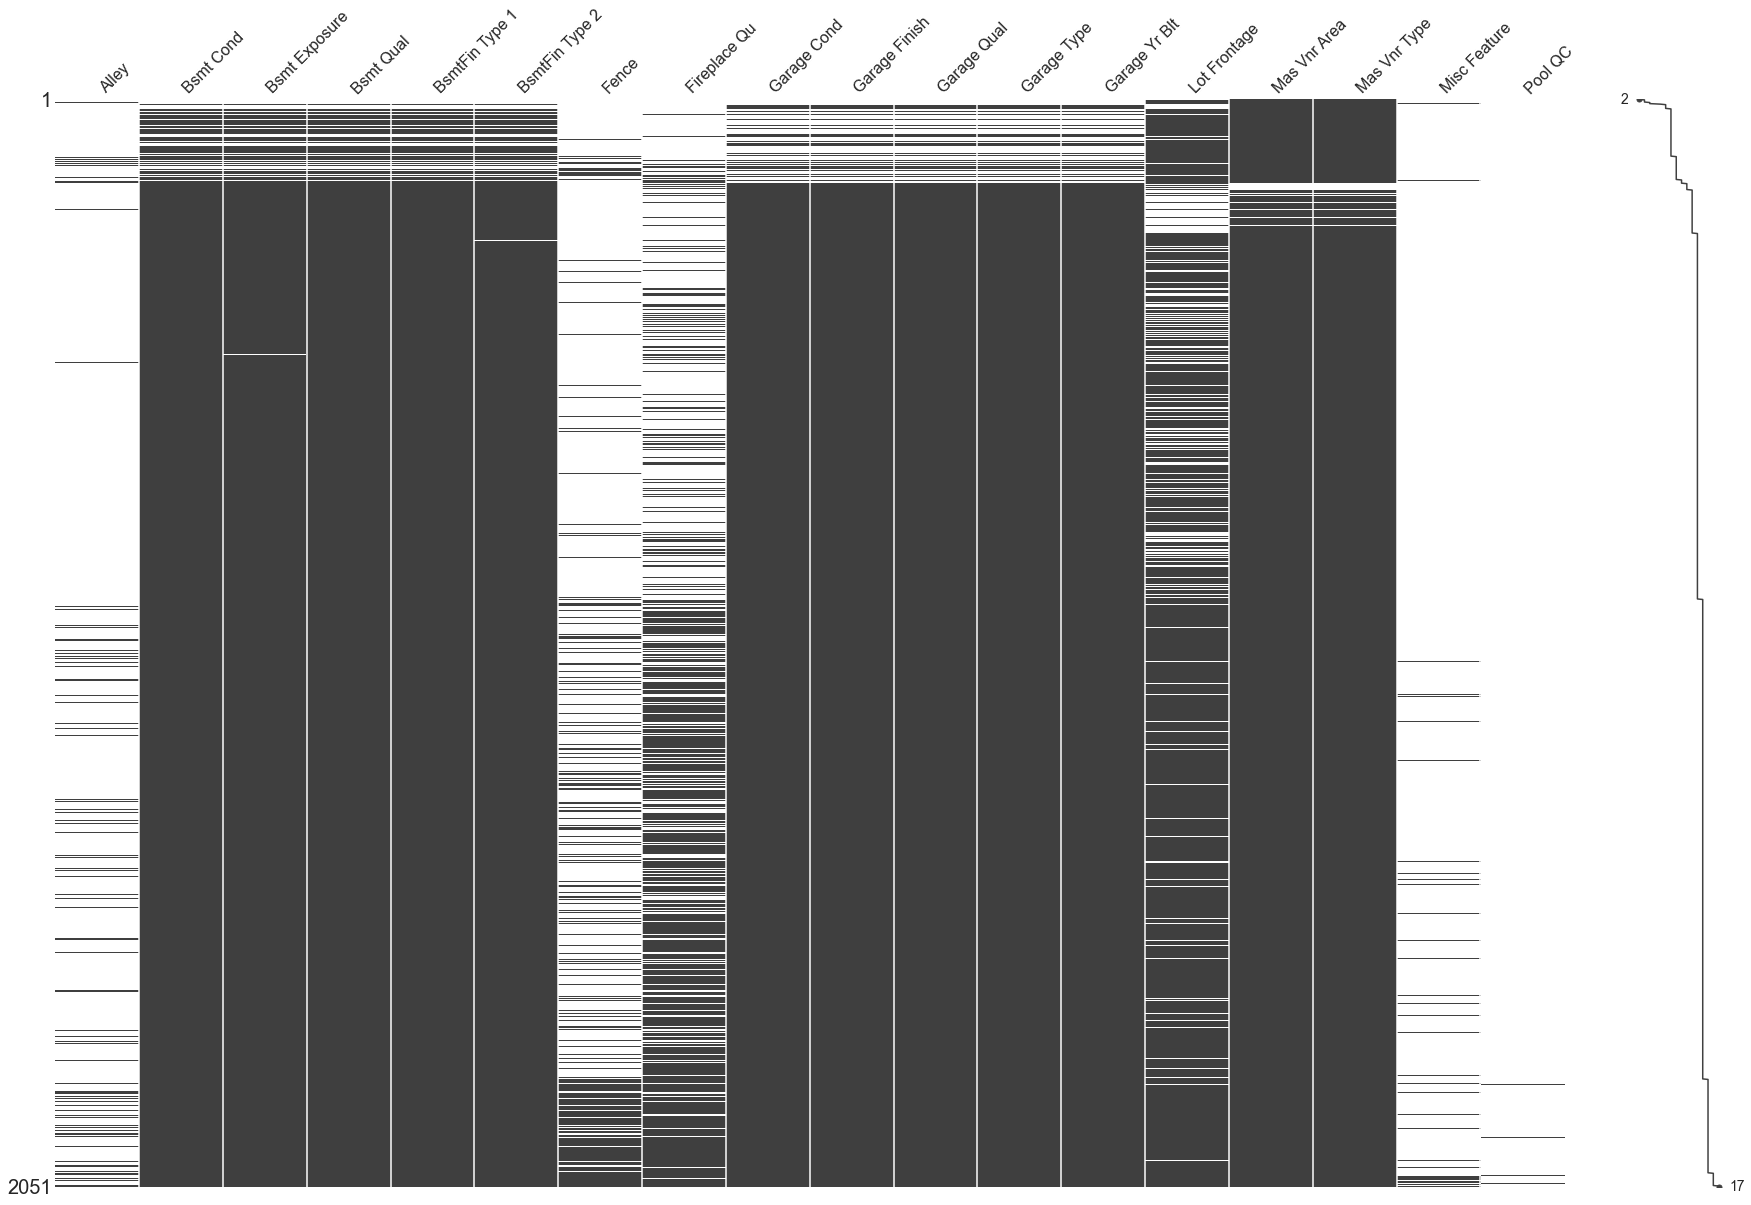

In [502]:
# Showing values with more than 1% of data missing
missingno.matrix(train_df, figsize = (30,20), filter='bottom',n=20, p=0.99, sort='ascending')

**Columns with more than 80% of their values should be considered for deleting.**

**Rows with columns that have less than 1% of their values missing should be considered for removal.**

In [503]:
train_df.info(verbose=True)
# Check for data types and null values
# https://stackoverflow.com/questions/23168416/pandas-printing-all-dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1st Flr SF       2051 non-null   int64  
 1   2nd Flr SF       2051 non-null   int64  
 2   3Ssn Porch       2051 non-null   int64  
 3   Alley            140 non-null    object 
 4   Bedroom AbvGr    2051 non-null   int64  
 5   Bldg Type        2051 non-null   object 
 6   Bsmt Cond        1996 non-null   object 
 7   Bsmt Exposure    1993 non-null   object 
 8   Bsmt Full Bath   2049 non-null   float64
 9   Bsmt Half Bath   2049 non-null   float64
 10  Bsmt Qual        1996 non-null   object 
 11  Bsmt Unf SF      2050 non-null   float64
 12  BsmtFin SF 1     2050 non-null   float64
 13  BsmtFin SF 2     2050 non-null   float64
 14  BsmtFin Type 1   1996 non-null   object 
 15  BsmtFin Type 2   1995 non-null   object 
 16  Central Air      2051 non-null   object 
 17  Condition 1   

**2.1.5. Check for Unique Values in Each Column of Ames, Iowa Housing dataset**

In [504]:
for column in reversed(train_df.columns):
# Shift through the column names with a For loop
    
    columnSeriesObj = train_df[column].unique()
    # Get unique values in columns
    
    coltype = train_df[column].dtype
    # Get column data types
    
    if len(train_df[column].unique()) <13:
    # Pull for columns with unique values less than 13
        
        print(f'{column} ({coltype}): {columnSeriesObj}')

Yr Sold (int64): [2010 2009 2006 2007 2008]
Utilities (object): ['AllPub' 'NoSeWa' 'NoSewr']
Street (object): ['Pave' 'Grvl']
Sale Type (object): ['WD ' 'New' 'COD' 'ConLD' 'Con' 'CWD' 'Oth' 'ConLI' 'ConLw']
Roof Style (object): ['Gable' 'Hip' 'Flat' 'Mansard' 'Shed' 'Gambrel']
Roof Matl (object): ['CompShg' 'WdShngl' 'Tar&Grv' 'WdShake' 'Membran' 'ClyTile']
Pool QC (object): [nan 'Fa' 'Gd' 'Ex' 'TA']
Pool Area (int64): [  0 519 576 800 228 480 648 738 368 561]
Paved Drive (object): ['Y' 'N' 'P']
Overall Qual (int64): [ 6  7  5  8 10  4  9  3  2  1]
Overall Cond (int64): [8 5 7 6 3 9 2 4 1]
Mo Sold (int64): [ 3  4  1  6  5  9  7  2 12 10 11  8]
Misc Feature (object): [nan 'Shed' 'TenC' 'Gar2' 'Othr' 'Elev']
Mas Vnr Type (object): ['BrkFace' 'None' nan 'Stone' 'BrkCmn']
MS Zoning (object): ['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
Lot Shape (object): ['IR1' 'Reg' 'IR2' 'IR3']
Lot Config (object): ['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']
Land Slope (object): ['Gtl' 'Sev' 'Mod'

# 2.0 Graphs and Visualization

In [505]:
# Let’s plot the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        
        if dataset.dtypes[column] == np.object:# If it is a string or float
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
            
        else:
            g = sns.histplot(dataset[column])
            plt.xticks(rotation=25)
    
# reference https://github.com/dformoso/sklearn-classification/blob/master/Data%20Science%20Workbook%20-%20Census%20Income%20Dataset.ipynb

In [506]:
# plot_distribution(train_df, cols=3, width=20, height=90, hspace=0.45, wspace=0.5)

In [507]:
# Let’s plot the distribution of each feature against the Sales price
def plot_distribution_comp(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        
        if dataset.dtypes[column] == np.object:# If it is a string or float
            g = sns.violinplot(x=column,y=train_df['SalePrice'], data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
            
        else:
            g = sns.scatterplot(x = dataset[column], y = train_df['SalePrice'])
            plt.xticks(rotation=25)
    
# reference https://github.com/dformoso/sklearn-classification/blob/master/Data%20Science%20Workbook%20-%20Census%20Income%20Dataset.ipynb

In [508]:
# plot_distribution_comp(train_df, cols=3, width=20, height=90, hspace=0.45, wspace=0.5)

## 3.0 Refine Columns

#### Ensure Column names are lower-cased and have no spaces

In [509]:
# Best practise to keep column names lower case and without spaces, the following commands clean this up
train_df.columns = train_df.columns.str.replace(' ', '_') 
# Reference: https://www.geeksforgeeks.org/remove-spaces-from-column-names-in-pandas/
train_df.columns= train_df.columns.str.lower()

In [510]:
# Best practise to keep column names lower case and without spaces, the following commands clean this up
test_df.columns = test_df.columns.str.replace(' ', '_') 
# Reference: https://www.geeksforgeeks.org/remove-spaces-from-column-names-in-pandas/
test_df.columns= test_df.columns.str.lower()

## 3.1 Features Missing more than 80% of values 
Consider to not utilize, except we see reason with further analysis below

In [511]:
# Check percentage of null values in each column
((train_df.isnull().sum().sort_values(ascending = False).head(6))/2051)*100

pool_qc         99.561190
misc_feature    96.830814
alley           93.174061
fence           80.497318
fireplace_qu    48.756704
lot_frontage    16.089712
dtype: float64

## 3.2 Single Variable with more than 78% Dominance
Consider to not utilize, except we see reason with further analysis below

In [512]:
for column in reversed(train_df.columns):
    
    columnSeriesObj = train_df[column].unique()
    
    columnValueCount = train_df[column].value_counts(normalize=True).tolist()[0]
    
    if len(train_df[column].unique()) <30 and train_df[column].value_counts(normalize=True).tolist()[0] > 0.75:
        
        print(f'{column}: {round(columnValueCount*100)}%')

utilities: 100%
street: 100%
sale_type: 87%
roof_style: 79%
roof_matl: 99%
pool_area: 100%
paved_drive: 91%
misc_val: 97%
misc_feature: 86%
ms_zoning: 78%
land_slope: 95%
land_contour: 90%
kitchen_abvgr: 96%
heating: 98%
garage_qual: 95%
garage_cond: 96%
functional: 93%
exter_cond: 87%
electrical: 91%
condition_2: 99%
condition_1: 86%
central_air: 93%
bsmtfin_type_2: 88%
bsmt_half_bath: 94%
bsmt_cond: 92%
bldg_type: 83%
3ssn_porch: 99%


## 3.3 Something else has stronger correlation
We will not utilize for now, as there is something with a much stonger correlation

1. Fireplaces (superseded by Fireplace Qua)
2. Garage Yr Blt (superseded by Year Built)
3. Bedroom AbvGr (superseded by TotRms AbvGrd)
4. Bsmt Unf SF (total basement sq.feet stronger)
5. BsmtFin SF 2 + BsmtFin SF 1 (their summation gives [Total Bsmt SF])
6. [1st Flr SF] + [2nd Flr SF] (their summation gives['Gr Liv Area'])

## 3.4 Flat just random
We will not utilize for now as there is no discernable relationship or impact to our Data

1. ID
2. Yr Sold

## 3.5 [Continuous] with no relations
These are the features that have good coorelation with the target, we will utilize, but only after converting 'null' values to '0'
1. Lot Frontage
2. Lot Area
3. Mas Vnr Area
4. Garage Area
5. Garage Cars
6. TotRms AbvGrd
7. ['Gr Liv Area']
8. [Total Bsmt SF]

In [513]:
train_df[['lot_area', 'lot_frontage','mas_vnr_area','garage_area','garage_cars','totrms_abvgrd','gr_liv_area', 'total_bsmt_sf']].isnull().sum()

lot_area           0
lot_frontage     330
mas_vnr_area      22
garage_area        1
garage_cars        1
totrms_abvgrd      0
gr_liv_area        0
total_bsmt_sf      1
dtype: int64

In [514]:
train_df.update(train_df[['lot_area', 'lot_frontage','mas_vnr_area','garage_area','garage_cars','totrms_abvgrd','gr_liv_area', 'total_bsmt_sf']].fillna(0))

In [515]:
test_df.update(train_df[['lot_area', 'lot_frontage','mas_vnr_area','garage_area','garage_cars','totrms_abvgrd','gr_liv_area', 'total_bsmt_sf']].fillna(0))

In [516]:
train_df[['lot_area', 'lot_frontage','mas_vnr_area','garage_area','garage_cars','totrms_abvgrd','gr_liv_area', 'total_bsmt_sf']].isnull().sum()

lot_area         0
lot_frontage     0
mas_vnr_area     0
garage_area      0
garage_cars      0
totrms_abvgrd    0
gr_liv_area      0
total_bsmt_sf    0
dtype: int64

In [517]:
# Continuous dataframe
continuous_df = pd.DataFrame(columns =['lot_area', 'lot_frontage','mas_vnr_area','garage_area','garage_cars','totrms_abvgrd','gr_liv_area', 'total_bsmt_sf'], data = train_df)

In [518]:
# Continuous dataframe
test_continuous_df = pd.DataFrame(columns =['lot_area', 'lot_frontage','mas_vnr_area','garage_area','garage_cars','totrms_abvgrd','gr_liv_area', 'total_bsmt_sf'], data = test_df)

In [519]:
continuous_df.head()

lot_area  lot_frontage  mas_vnr_area  garage_area  garage_cars  \
0     13517           0.0         289.0        475.0          2.0   
1     11492          43.0         132.0        559.0          2.0   
2      7922          68.0           0.0        246.0          1.0   
3      9802          73.0           0.0        400.0          2.0   
4     14235          82.0           0.0        484.0          2.0   

   totrms_abvgrd  gr_liv_area  total_bsmt_sf  
0              6         1479          725.0  
1              8         2122          913.0  
2              5         1057         1057.0  
3              7         1444          384.0  
4              6         1445          676.0

## 3.6 [Continuous] With Relations
We will add columns (where applicable) and convert year to Number of Years

1. ['Wood Deck SF'] + ['Open Porch SF'] + ['Screen Porch'] + ['Enclosed Porch']
2. ['Bsmt Half Bath'] + ['Bsmt Full Bath']  (duplicated in 3.2)
3. ['Half Bath'] + ['Full Bath']
4. 2010 - [Year Built] Convert to actual years from 2021
5. 2010 - [Year Remold] Convert to actual years from 2021
6. Overall Qual + Overall Cond

#### 3.6.1 Add Outdoor Construction Square Footage

In [520]:
continuous_df['ext_area'] = train_df['wood_deck_sf'] + train_df['open_porch_sf'] + train_df['screen_porch'] + train_df['enclosed_porch']

In [521]:
test_continuous_df['ext_area'] = test_df['wood_deck_sf'] + test_df['open_porch_sf'] + test_df['screen_porch'] + test_df['enclosed_porch']

#### 3.6.2 Add Number of basement baths

In [522]:
continuous_df['bsmt_total_bath'] = train_df['bsmt_half_bath'] + train_df['bsmt_full_bath']

In [523]:
test_continuous_df['bsmt_total_bath'] = test_df['bsmt_half_bath'] + test_df['bsmt_full_bath']

In [524]:
train_df['bsmt_full_bath'].sort_values(ascending = False)

1584    3.0
791     3.0
289     2.0
1166    2.0
1410    2.0
       ... 
870     0.0
869     0.0
2050    0.0
616     NaN
1327    NaN
Name: bsmt_full_bath, Length: 2051, dtype: float64

#### 3.6.3 Add Number of House baths

In [525]:
continuous_df['total_bath'] = train_df['half_bath'] + train_df['full_bath']

In [526]:
test_continuous_df['total_bath'] = test_df['half_bath'] + test_df['full_bath']

#### 3.6.4 Age of House

In [527]:
continuous_df['year_built'] = 2010 - train_df['year_built']

In [528]:
test_continuous_df['year_built'] = 2010 - test_df['year_built']

#### 3.6.5 Age of House after Plastic Surgery

In [529]:
continuous_df['year_remod'] = 2010 - train_df['year_remod/add']

In [530]:
test_continuous_df['year_remod'] = 2010 - test_df['year_remod/add']

#### 3.6.6 Combined Overall Quality and Condition

In [531]:
continuous_df['overall_rating'] = train_df['overall_qual']# + train_df['overall_cond']

In [532]:
test_continuous_df['overall_rating'] = test_df['overall_qual']# + test_df['overall_cond']

## 3.7 [Categorical] That are Incorrect Types
We will convert their Data Types from Int to Strings so that we can treat as classifications to dummify.

1. PID: ['533', '531', '535', '916', '906', '908', '527', '907', '923',
       '902', '905', '528', '532', '909', '911', '534', '914', '903',
       '910', '526', '924', '913', '904', '921', '912']
2. Mo Sold: [ 3  4  1  6  5  9  7  2 12 10 11  8]
3. MS SubClass (convert from int to float)

### 3.7.1 PID

In [533]:
train_df['pid'].dtype

dtype('int64')

In [534]:
train_df['pid'] = train_df['pid'].astype(str)

In [535]:
test_df['pid'] = test_df['pid'].astype(str)

In [536]:
# Get the first 3 digits in PID
train_df['pid'] = train_df['pid'].apply(lambda x: x[:3])

In [537]:
# Get the first 3 digits in PID
test_df['pid'] = test_df['pid'].apply(lambda x: x[:3])

In [538]:
train_df['pid'].unique()

array(['533', '531', '535', '916', '906', '908', '527', '907', '923',
       '902', '905', '528', '532', '909', '911', '534', '914', '903',
       '910', '526', '924', '913', '904', '921', '912'], dtype=object)

In [539]:
train_df['pid'].dtype

dtype('O')

In [540]:
continuous_df['pid'] = train_df['pid']

In [541]:
test_continuous_df['pid'] = test_df['pid']

In [542]:
continuous_df.head()

lot_area  lot_frontage  mas_vnr_area  garage_area  garage_cars  \
0     13517           0.0         289.0        475.0          2.0   
1     11492          43.0         132.0        559.0          2.0   
2      7922          68.0           0.0        246.0          1.0   
3      9802          73.0           0.0        400.0          2.0   
4     14235          82.0           0.0        484.0          2.0   

   totrms_abvgrd  gr_liv_area  total_bsmt_sf  ext_area  bsmt_total_bath  \
0              6         1479          725.0        44              0.0   
1              8         2122          913.0        74              1.0   
2              5         1057         1057.0        52              1.0   
3              7         1444          384.0       100              0.0   
4              6         1445          676.0        59              0.0   

   total_bath  year_built  year_remod  overall_rating  pid  
0           3          34           5               6  533  
1           3          14          13               7  531  
2           1          57           3               5  535  
3           3           4           3               5  916  
4           2         110          17               6  906

In [543]:
test_continuous_df.head()

lot_area  lot_frontage  mas_vnr_area  garage_area  garage_cars  \
0     13517           0.0         289.0        475.0          2.0   
1     11492          43.0         132.0        559.0          2.0   
2      7922          68.0           0.0        246.0          1.0   
3      9802          73.0           0.0        400.0          2.0   
4     14235          82.0           0.0        484.0          2.0   

   totrms_abvgrd  gr_liv_area  total_bsmt_sf  ext_area  bsmt_total_bath  \
0              6         1479          725.0       172                0   
1              8         2122          913.0       170                0   
2              5         1057         1057.0       124                1   
3              7         1444          384.0       184                0   
4              6         1445          676.0       261                1   

   total_bath  year_built  year_remod  overall_rating  pid  
0           2         100          60               6  902  
1           2          33          33               5  905  
2           3           4           4               7  528  
3           1          87           4               5  902  
4           2          47          47               6  535

### 3.7.2 Months Sold

In [544]:
train_df['mo_sold'].dtype

dtype('int64')

In [545]:
train_df['mo_sold'] = train_df['mo_sold'].astype(str)

In [546]:
test_df['mo_sold'] = test_df['mo_sold'].astype(str)

In [547]:
train_df['mo_sold'].dtype

dtype('O')

In [548]:
continuous_df['mo_sold'] = train_df['mo_sold']

In [549]:
test_continuous_df['mo_sold'] = test_df['mo_sold']

### 3.7.3 MS SubClass

In [550]:
train_df['ms_subclass'].dtype

dtype('int64')

In [551]:
train_df['ms_subclass'] = train_df['ms_subclass'].astype(str)

In [552]:
test_df['ms_subclass'] = test_df['ms_subclass'].astype(str)

In [553]:
train_df['ms_subclass'].dtype

dtype('O')

In [554]:
continuous_df['ms_subclass'] = train_df['ms_subclass']

In [555]:
test_continuous_df['ms_subclass'] = test_df['ms_subclass']

## 3.8 [Categorical] Use on their own
These are the Categorical features that have good correlation with the target, we will utilize as is.

1. House Style 
2. Foundation
3. Neighborhood
4. Exterior 1st
5. Exterior 2nd
6. Mas Vnr Type
7. Garage Type
8. Roof Style and Roof Material (Study them maybe bin them)

In [556]:
categorical_df = pd.DataFrame( data = train_df, columns =['house_style', 'foundation', 'neighborhood','exterior_1st', 'exterior_2nd', 'mas_vnr_type','garage_type'])

In [557]:
test_categorical_df = pd.DataFrame( data = test_df, columns =['house_style', 'foundation', 'neighborhood','exterior_1st', 'exterior_2nd', 'mas_vnr_type','garage_type'])

In [558]:
categorical_df = pd.get_dummies(data=categorical_df, columns=['house_style', 'foundation', 'neighborhood','exterior_1st', 'exterior_2nd', 'mas_vnr_type','garage_type'], drop_first=True)

In [559]:
test_categorical_df = pd.get_dummies(data=test_categorical_df, columns=['house_style', 'foundation', 'neighborhood','exterior_1st', 'exterior_2nd', 'mas_vnr_type','garage_type'], drop_first=True)

## 3.9 [Categorical] Make Binary just 2 values
These are features I believe, would be best treated as BINARY, meaning we would have to reduce their unique values to 2.

1. Does not have [Kitchen AbvGr]
2. Does house have a pool or not use [Pool Area: 100%] and [Pool QC]
3. Lotconfig [culdesac or corner should be in one column]
4. Change to 2 classes, not SBrkr for Elctircal (used in 2.0)
5. Central Air, yes or no (used in 2.0)
6. Does not have any [Low Qual Fin SF] == 0 and >0

#### 3.9.1 Houses with Kitchen

In [560]:
print (f"Houses without Kitchens that sold for more than $150,000: {round(100*(train_df[(train_df['kitchen_abvgr'] == 0) & (train_df['saleprice'] > 150000)].shape[0]/train_df[train_df['kitchen_abvgr'] == 0].shape[0]))}%")
print (f"Houses with Kitchens that sold for more than $150,000: {round(100*(train_df[(train_df['kitchen_abvgr'] != 0) & (train_df['saleprice'] > 150000)].shape[0]/train_df[train_df['kitchen_abvgr'] != 0].shape[0]))}%")

Houses without Kitchens that sold for more than $150,000: 0%
Houses with Kitchens that sold for more than $150,000: 57%


In [561]:
categorical_df['kitchen_bin'] = np.where(train_df['kitchen_abvgr'] != 0, 1, 0)

In [562]:
test_categorical_df['kitchen_bin'] = np.where(test_df['kitchen_abvgr'] != 0, 1, 0)

In [563]:
categorical_df.head()

house_style_1.5Unf  house_style_1Story  house_style_2.5Fin  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   1                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   house_style_2.5Unf  house_style_2Story  house_style_SFoyer  \
0                   0                   1                   0   
1                   0                   1                   0   
2                   0                   0                   0   
3                   0                   1                   0   
4                   0                   0                   0   

   house_style_SLvl  foundation_CBlock  foundation_PConc  foundation_Slab  \
0                 0                  1                 0                0   
1                 0                  0                 1                0   
2                 0                  1                 0                0   
3                 0                  0                 1                0   
4                 0                  0                 1                0   

   ...  exterior_2nd_Wd Shng  mas_vnr_type_BrkFace  mas_vnr_type_None  \
0  ...                     0                     1                  0   
1  ...                     0                     1                  0   
2  ...                     0                     0                  1   
3  ...                     0                     0                  1   
4  ...                     0                     0                  1   

   mas_vnr_type_Stone  garage_type_Attchd  garage_type_Basment  \
0                   0                   1                    0   
1                   0                   1                    0   
2                   0                   0                    0   
3                   0                   0                    0   
4                   0                   0                    0   

   garage_type_BuiltIn  garage_type_CarPort  garage_type_Detchd  kitchen_bin  
0                    0                    0                   0            1  
1                    0                    0                   0            1  
2                    0                    0                   1            1  
3                    1                    0                   0            1  
4                    0                    0                   1            1  

[5 rows x 76 columns]

#### 3.9.2 Houses with Pool

In [564]:
print (f"Houses with pools that sold for less than $150,000: {round(100*(train_df[(train_df['pool_area'] == 0) & (train_df['saleprice'] < 150000)].shape[0]/train_df[train_df['pool_area'] == 0].shape[0]))}%")
print (f"Houses without pools that sold for less than $150,000: {round(100*(train_df[(train_df['pool_area'] != 0) & (train_df['saleprice'] < 150000)].shape[0]/train_df[train_df['pool_area'] != 0].shape[0]))}%")

Houses with pools that sold for less than $150,000: 43%
Houses without pools that sold for less than $150,000: 11%


In [565]:
categorical_df['pool_bin'] = np.where(train_df['pool_area'] != 0, 1, 0)

In [566]:
test_categorical_df['pool_bin'] = np.where(test_df['pool_area'] != 0, 1, 0)

#### 3.9.3 Houses with Cul De Sac or Corner Lot

In [567]:
print (f"Houses on Corner lot that sold for less than $150,000: {round(100*(train_df[(train_df['lot_config'] == 'CulDSac') | (train_df['lot_config'] == 'Corner') & (train_df['saleprice'] < 150000)].shape[0]/train_df[(train_df['lot_config'] == 'CulDSac') | (train_df['lot_config'] == 'Corner')].shape[0]))}%")
print (f"Houses not on Corner lot that sold for less than $150,000: {round(100*(train_df[(train_df['lot_config'] != 'CulDSac') | (train_df['lot_config'] != 'Corner') & (train_df['saleprice'] < 150000)].shape[0]/train_df[(train_df['lot_config'] != 'CulDSac') | (train_df['lot_config'] != 'Corner')].shape[0]))}%")

Houses on Corner lot that sold for less than $150,000: 57%
Houses not on Corner lot that sold for less than $150,000: 95%


In [568]:
categorical_df['corner'] = np.where(((train_df['lot_config'] == 'CulDSac') | (train_df['lot_config'] == 'Corner')),1,0)

In [569]:
test_categorical_df['corner'] = np.where(((test_df['lot_config'] == 'CulDSac') | (test_df['lot_config'] == 'Corner')),1,0)

#### 3.9.4 Houses with Electrical that Have Standard Circuit Breakers

In [570]:
print (f"Houses with Circuit Breakers that sold for less than $150,000: {round(100*(train_df[(train_df['electrical'] == 'SBrkr') & (train_df['saleprice'] < 150000)].shape[0]/train_df[train_df['electrical'] == 'SBrkr'].shape[0]))}%")
print (f"Houses without Circuit Breakers that sold for less than $150,000: {round(100*(train_df[(train_df['electrical'] != 'SBrkr') & (train_df['saleprice'] < 150000)].shape[0]/train_df[train_df['electrical'] != 'SBrkr'].shape[0]))}%")

Houses with Circuit Breakers that sold for less than $150,000: 39%
Houses without Circuit Breakers that sold for less than $150,000: 83%


In [571]:
categorical_df['elec_sbrkrs_bin'] = np.where(train_df['electrical'] == 'SBrkr', 1, 0)

In [572]:
test_categorical_df['elec_sbrkrs_bin'] = np.where(test_df['electrical'] == 'SBrkr', 1, 0)

#### 3.9.5 Houses with Central Air

In [573]:
print (f"Houses with Central Air that sold for less than $100,000: {round(100*(train_df[(train_df['central_air'] == 'Y') & (train_df['saleprice'] < 100000)].shape[0]/train_df[train_df['central_air'] == 'Y'].shape[0]))}%")
print (f"Houses without Central Air that sold for less than $100,000: {round(100*(train_df[(train_df['central_air'] == 'N') & (train_df['saleprice'] < 100000)].shape[0]/train_df[train_df['central_air'] == 'N'].shape[0]))}%")

Houses with Central Air that sold for less than $100,000: 5%
Houses without Central Air that sold for less than $100,000: 52%


In [574]:
categorical_df['central_air'] = np.where(train_df['central_air'] == 'Y', 1, 0)

In [575]:
test_categorical_df['central_air'] = np.where(test_df['central_air'] == 'Y', 1, 0)

#### 3.9.6 Houses with High Qual Fin SF

In [576]:
print (f"Houses with no Low Quality Square Footage that sold for less than $150,000: {round(100*(train_df[(train_df['low_qual_fin_sf'] == 0) & (train_df['saleprice'] < 150000)].shape[0]/train_df[train_df['low_qual_fin_sf'] == 0].shape[0]))}%")
print (f"Houses with Low Quality Square Footage that sold for less than $150,000: {round(100*(train_df[(train_df['low_qual_fin_sf'] != 0) & (train_df['saleprice'] < 150000)].shape[0]/train_df[train_df['low_qual_fin_sf'] != 0].shape[0]))}%")

Houses with no Low Quality Square Footage that sold for less than $150,000: 42%
Houses with Low Quality Square Footage that sold for less than $150,000: 73%


In [577]:
x = round(100*(train_df[(train_df['low_qual_fin_sf'] == 0) & (train_df['saleprice'] < 150000)].shape[0]/train_df[train_df['low_qual_fin_sf'] == 0].shape[0]))
y = round(100*(train_df[(train_df['low_qual_fin_sf'] != 0) & (train_df['saleprice'] < 150000)].shape[0]/train_df[train_df['low_qual_fin_sf'] != 0].shape[0]))

In [578]:
categorical_df['high_quality_bin'] = np.where(train_df['low_qual_fin_sf'] != 0, 1, 0)

In [579]:
test_categorical_df['high_quality_bin'] = np.where(test_df['low_qual_fin_sf'] != 0, 1, 0)

### 4.0 [Ordinal Categorical]
We would have to convert from String Object to Int because they are ordinal, we would do so with a Dictionary.

1. Garage Cond: ['TA' 'Fa' nan 'Po' 'Gd' 'Ex'] (used in 2.0)
2. Garage Qual: ['TA' 'Fa' nan 'Gd' 'Ex' 'Po'] (used in 2.0)
3. Fireplace Qu: [nan 'TA' 'Gd' 'Po' 'Ex' 'Fa']
4. Functional: ['Typ' 'Mod' 'Min2' 'Maj1' 'Min1' 'Sev' 'Sal' 'Maj2']    (used in 2.0)
5. Kitchen Qual: ['Gd' 'TA' 'Fa' 'Ex']
6. Heating QC: ['Ex' 'TA' 'Gd' 'Fa' 'Po']
7. Bsmt Exposure: ['No' 'Gd' 'Av' nan 'Mn']
8. Bsmt Cond: ['TA' 'Gd' nan 'Fa' 'Po' 'Ex'] (used in 2.0)
9. Bsmt Qual: ['TA' 'Gd' 'Fa' nan 'Ex' 'Po']
10. BsmtFin Type 1 (object): ['GLQ' 'Unf' 'ALQ' 'Rec' nan 'BLQ' 'LwQ']
11. Exter Cond: ['TA' 'Gd' 'Fa' 'Ex' 'Po'] (used in 2.0)
12. Exter Qual: ['Gd' 'TA' 'Ex' 'Fa']
13. MS Zoning: ['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']       (used in 2.0)
14. Lot Shape: [Reg,IR1,IR2,IR3]
15. Garage Finish: ['RFn' 'Unf' 'Fin' nan]

#### 4.0.1 Convert all 'NA' to 0

In [580]:
train_df.update(train_df[['garage_cond','garage_qual','fireplace_qu','functional', 'kitchen_qual', 'heating_qc',  'bsmt_exposure','bsmt_cond', 'bsmt_qual','bsmtfin_type_1','exter_cond', 'exter_qual','ms_zoning', 'lot_shape','garage_finish']].fillna(0))

In [581]:
test_df.update(test_df[['garage_cond','garage_qual','fireplace_qu','functional', 'kitchen_qual', 'heating_qc',  'bsmt_exposure','bsmt_cond', 'bsmt_qual','bsmtfin_type_1','exter_cond', 'exter_qual','ms_zoning', 'lot_shape','garage_finish']].fillna(0))

#### 4.0.2 Convert Categories to Ordinal Integer Values

In [582]:
# Ordinal Dictionary
mapping = {   0 : 0,
           "Po" : 1,
           "Fa" : 2,
           "TA" : 3,
           "Gd" : 4,
           "Ex" : 5,
           "GLQ": 6,
           "ALQ": 5,
           "BLQ": 4,
           "Rec": 3,
           "LwQ": 2,
           "Unf": 1,
           "Av" : 3,
           "Mn" : 2,
           "No" : 1,
           'RH' : 5,
            'RM':4,
            'RL':3,
            'RP':2,
           'FV' : 1,
           'C (all)' : 1,
           'A (agr)': 1,
           'I (all)': 1,
           'Typ'    :7,
          'Min1':6,   
           'Min2':5,    
           'Mod':4,    
           'Maj1':3,
           'Maj2':2,    
           'Sev':1,    
           'Sal':0,
           "Reg":4,
           "IR1":3,
           "IR2":2,
           "IR3":1,
           'Fin' :3,
           'RFn' :2,
           'Unf':1  
          }

# reference https://stackoverflow.com/questions/54440507/encoding-ordinal-values-in-python

In [583]:
# Sample dataframe with 2 ordinal categorical columns: 'temp' and 'place'
ordinal_categorical_df = pd.DataFrame(columns =['garage_cond','garage_qual','fireplace_qu','functional', 'kitchen_qual', 'heating_qc',  'bsmt_exposure','bsmt_cond', 'bsmt_qual','bsmtfin_type_1','exter_cond', 'exter_qual','ms_zoning', 'lot_shape','garage_finish'], data = train_df)

In [584]:
# Sample dataframe with 2 ordinal categorical columns: 'temp' and 'place'
test_ordinal_categorical_df = pd.DataFrame(columns =['garage_cond','garage_qual','fireplace_qu','functional', 'kitchen_qual', 'heating_qc',  'bsmt_exposure','bsmt_cond', 'bsmt_qual','bsmtfin_type_1','exter_cond', 'exter_qual','ms_zoning', 'lot_shape','garage_finish'], data = test_df)

In [585]:
ordinal_categorical_df.head()

garage_cond garage_qual fireplace_qu functional kitchen_qual heating_qc  \
0          TA          TA            0        Typ           Gd         Ex   
1          TA          TA           TA        Typ           Gd         Ex   
2          TA          TA            0        Typ           Gd         TA   
3          TA          TA            0        Typ           TA         Gd   
4          TA          TA            0        Typ           TA         TA   

  bsmt_exposure bsmt_cond bsmt_qual bsmtfin_type_1 exter_cond exter_qual  \
0            No        TA        TA            GLQ         TA         Gd   
1            No        TA        Gd            GLQ         TA         Gd   
2            No        TA        TA            GLQ         Gd         TA   
3            No        TA        Gd            Unf         TA         TA   
4            No        Gd        Fa            Unf         TA         TA   

  ms_zoning lot_shape garage_finish  
0        RL       IR1           RFn  
1        RL       IR1           RFn  
2        RL       Reg           Unf  
3        RL       Reg           Fin  
4        RL       IR1           Unf

In [586]:
ordinal_categorical_df = ordinal_categorical_df.applymap(lambda x: mapping[x])

In [587]:
test_ordinal_categorical_df = test_ordinal_categorical_df.applymap(lambda x: mapping[x])

In [588]:
ordinal_categorical_df.isnull().sum()

garage_cond       0
garage_qual       0
fireplace_qu      0
functional        0
kitchen_qual      0
heating_qc        0
bsmt_exposure     0
bsmt_cond         0
bsmt_qual         0
bsmtfin_type_1    0
exter_cond        0
exter_qual        0
ms_zoning         0
lot_shape         0
garage_finish     0
dtype: int64

## 4.0 Feature Selection
**Summary** We have 3 unique Data Frames we want to now study and analyze further

In [589]:
ordinal_categorical_df.shape

(2051, 15)

In [590]:
ordinal_categorical_df['saleprice'] = train_df['saleprice'] 

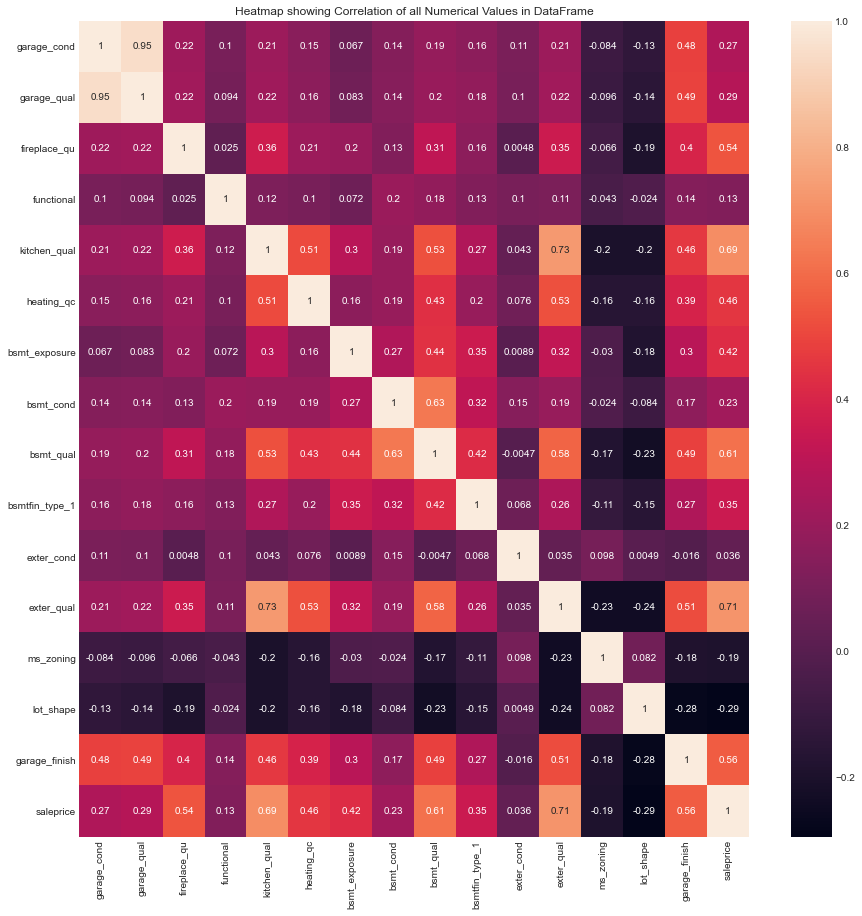

In [591]:
corrmat = ordinal_categorical_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (15,15))
ax=sns.heatmap(ordinal_categorical_df[top_corr_features].corr(),annot=True,cmap='rocket')
ax.set(title='Heatmap showing Correlation of all Numerical Values in DataFrame');

In [592]:
bins_df = pd.DataFrame(columns =['kitchen_bin', 'pool_bin','corner','elec_sbrkrs_bin', 'central_air','high_quality_bin'], data = categorical_df)

In [593]:
bins_df['saleprice'] = train_df['saleprice']

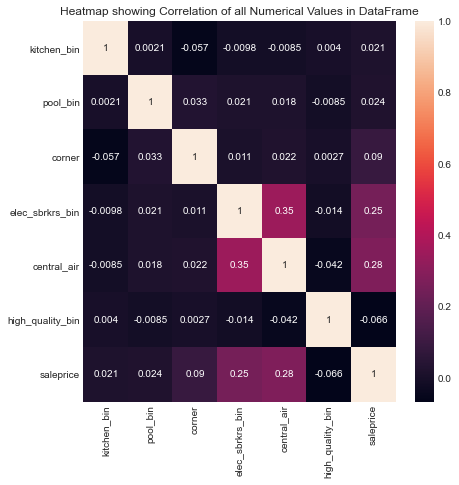

In [594]:
corrmat = bins_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (7,7))
ax=sns.heatmap(bins_df[top_corr_features].corr(),annot=True,cmap='rocket')
ax.set(title='Heatmap showing Correlation of all Numerical Values in DataFrame');

In [595]:
continuous_df['saleprice'] = train_df['saleprice'] 

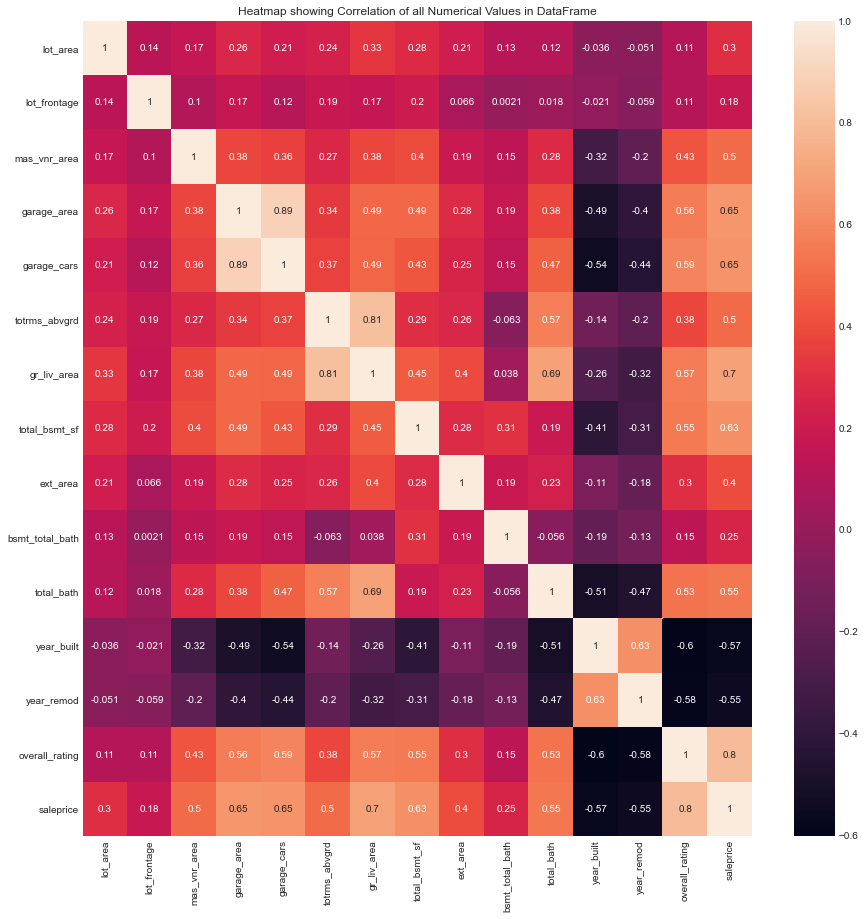

In [596]:
corrmat = continuous_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (15,15))
ax=sns.heatmap(continuous_df[top_corr_features].corr(),annot=True,cmap='rocket')
ax.set(title='Heatmap showing Correlation of all Numerical Values in DataFrame');

In [597]:
numerics = [x for x in continuous_df.select_dtypes(exclude='object').columns if x not in ['saleprice']]

In [598]:
for x in continuous_df[numerics].columns:
    print('The skew for', x, 'is', stats.skew(continuous_df[x]))

The skew for lot_area is 9.198216525895823
The skew for lot_frontage is 0.11180008319075663
The skew for mas_vnr_area is 2.609851156193066
The skew for garage_area is 0.19651555209552632
The skew for garage_cars is -0.22951884593659003
The skew for totrms_abvgrd is 0.843323076975732
The skew for gr_liv_area is 1.2805541157305433
The skew for total_bsmt_sf is 1.3797196555874
The skew for ext_area is 1.4150507643740609
The skew for bsmt_total_bath is nan
The skew for total_bath is 0.3920818001093256
The skew for year_built is 0.6074682376743004
The skew for year_remod is 0.45087463868924166
The skew for overall_rating is 0.14835227601567955


In [599]:
log_continuous_df = pd.DataFrame()

In [600]:
for x in continuous_df[numerics].columns:
    if stats.skew(continuous_df[x]) > 0.75 or stats.skew(continuous_df[x]) < -0.75:
        log_continuous_df[x] = np.log1p(continuous_df[x])
    else:
        log_continuous_df[x] = continuous_df[x]

As a general rule of thumb:

If skewness is less than -1 or greater than 1, the distribution is highly skewed.

If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.

If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [601]:
for x in log_continuous_df[numerics].columns:
    print('The skew for', x, 'is', stats.skew(log_continuous_df[x]))

The skew for lot_area is -0.5666258865937949
The skew for lot_frontage is 0.11180008319075663
The skew for mas_vnr_area is 0.542199294424522
The skew for garage_area is 0.19651555209552632
The skew for garage_cars is -0.22951884593659003
The skew for totrms_abvgrd is 0.0890736830986612
The skew for gr_liv_area is 0.0012403530087373323
The skew for total_bsmt_sf is -4.961357294612154
The skew for ext_area is -1.3300853886863873
The skew for bsmt_total_bath is nan
The skew for total_bath is 0.3920818001093256
The skew for year_built is 0.6074682376743004
The skew for year_remod is 0.45087463868924166
The skew for overall_rating is 0.14835227601567955


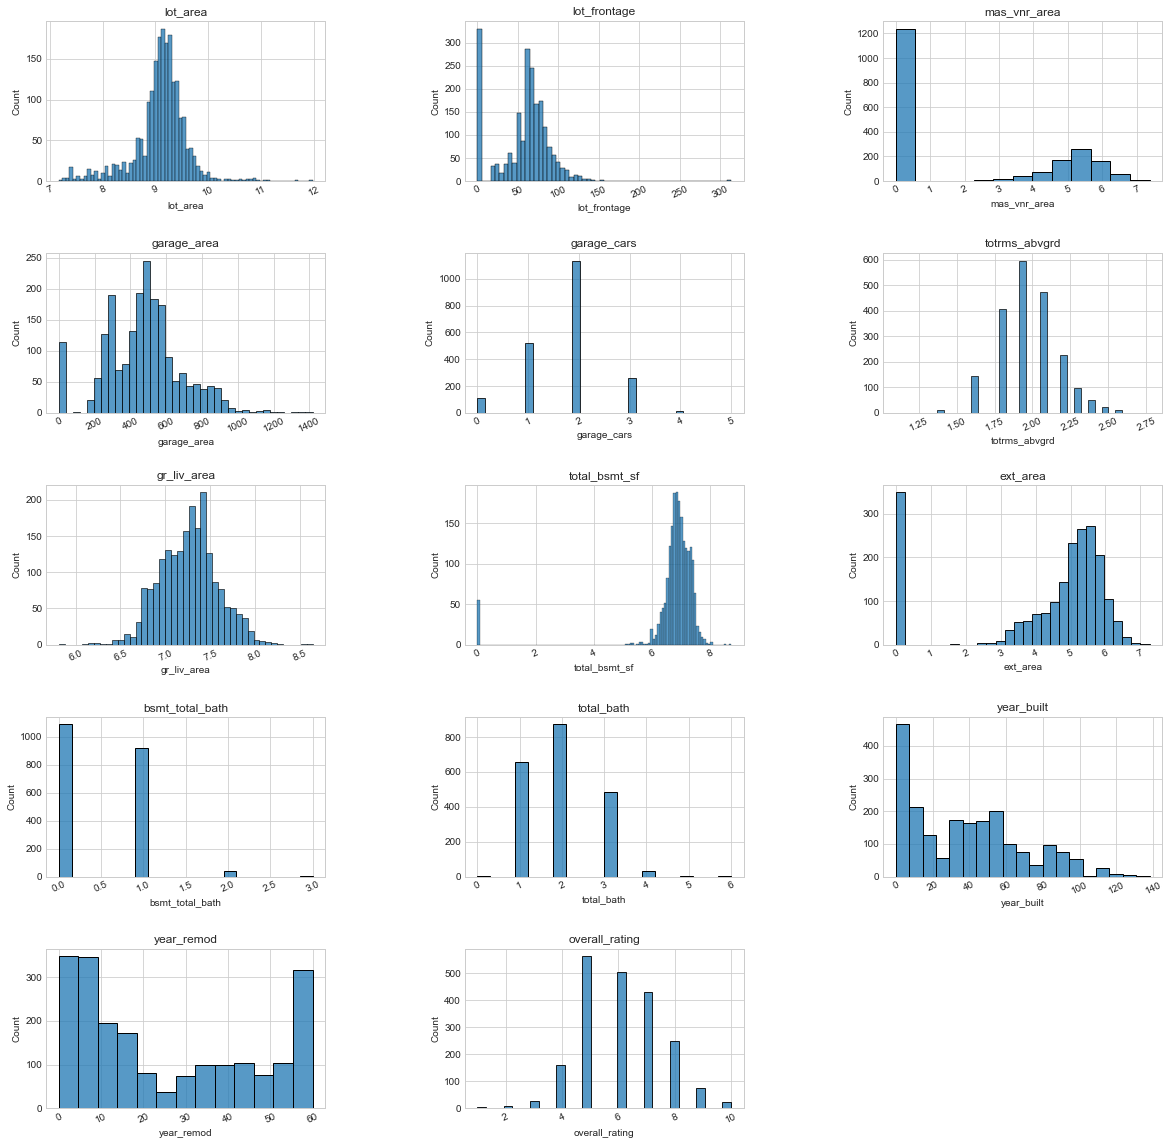

In [602]:
plot_distribution(log_continuous_df, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

In [603]:
log_continuous_df.head()

lot_area  lot_frontage  mas_vnr_area  garage_area  garage_cars  \
0  9.511777           0.0      5.669881        475.0          2.0   
1  9.349493          43.0      4.890349        559.0          2.0   
2  8.977525          68.0      0.000000        246.0          1.0   
3  9.190444          73.0      0.000000        400.0          2.0   
4  9.563529          82.0      0.000000        484.0          2.0   

   totrms_abvgrd  gr_liv_area  total_bsmt_sf  ext_area  bsmt_total_bath  \
0       1.945910     7.299797       6.587550  3.806662              0.0   
1       2.197225     7.660585       6.817831  4.317488              1.0   
2       1.791759     6.964136       6.964136  3.970292              1.0   
3       2.079442     7.275865       5.953243  4.615121              0.0   
4       1.945910     7.276556       6.517671  4.094345              0.0   

   total_bath  year_built  year_remod  overall_rating  
0           3          34           5               6  
1           3          14          13               7  
2           1          57           3               5  
3           3           4           3               5  
4           2         110          17               6

In [604]:
frames = [ordinal_categorical_df, categorical_df , continuous_df]

combined_df = pd.concat(frames, axis = 1)

In [605]:
frames_log = [ordinal_categorical_df, categorical_df , log_continuous_df]

log_combined_df = pd.concat(frames, axis = 1)

In [606]:
log_combined_df.isnull().sum().sort_values(ascending = False)

bsmt_total_bath         2
garage_cond             0
exterior_2nd_CBlock     0
mas_vnr_type_None       0
mas_vnr_type_BrkFace    0
                       ..
neighborhood_Edwards    0
neighborhood_Crawfor    0
neighborhood_CollgCr    0
neighborhood_ClearCr    0
saleprice               0
Length: 115, dtype: int64

In [607]:
test_frames = [test_ordinal_categorical_df, test_categorical_df , test_continuous_df]

test_combined_df = pd.concat(test_frames, axis = 1)

In [608]:
X_test = test_combined_df

In [609]:
# Unscaled for CV
X = combined_df.drop('saleprice', axis=1) # data: This removes survived from the list
X_log = log_combined_df.drop('saleprice', axis=1) # data: This removes survived from the list
y = combined_df['saleprice'] # labels

In [610]:
y = y.iloc[:,:-1] # drop duplicate

In [611]:
y.head()

saleprice
0     130500
1     220000
2     109000
3     174000
4     138500

In [612]:
X = X.fillna(0)

In [616]:
# Convert submisison dataframe to csv for submission to csv 
X.to_csv('/Users/macbook/Google Drive/0. Ofilispeaks Business (Mac and Cloud)/9. Data Science/0. Python/General Assembly Training/project_2-master/datasets/combined_df.csv', index=False)

X_test.to_csv('/Users/macbook/Google Drive/0. Ofilispeaks Business (Mac and Cloud)/9. Data Science/0. Python/General Assembly Training/project_2-master/datasets/test_combined_df.csv', index=False)

In [614]:
X_train,X_test,y_train,y_test = train_test_split(X_log, y, random_state=42, test_size = 0.25)

In [615]:
lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.8811137256858395

# Finding Best Models

**Function to Score Our Models, bot on Scaled and Unscaled Datasets.**

Linear Algorithms

1. Linear Regression
2. ElasticNet
3. Ridge Regression (L2 Regularization)
4. Lasso Regularization (L1 Regularization)

Non-Linear Algorithms

1. K Nearest Neighbours
2. Decision Tree

In [617]:
# Function that runs the requested algorithm and returns the accuracy metrics
def multi_algo (algo, test_size, X, y, cv):
    
    # Split
    X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, test_size = test_size)
    
    #Fit
    model = algo.fit(X_train, y_train)
    
    # 1. Train Scores
    
    split_accuracy_score_train = round(model.score(X_train, y_train) * 100, 2)
    
    # 2. Test Scores
    
    split_accuracy_score_test = round(model.score(X_test, y_test) * 100, 2)
    y_pred = model.predict(X_test)
    rms = round(mean_squared_error(y_test, y_pred, squared=False), 2)
    
    # 3. Cross Validation Scores

    cv_accuracy_score = list(cross_val_score(model, X, y, cv = cv, scoring='neg_root_mean_squared_error'))
    cv_accuracy_score_max = round(max(cv_accuracy_score), 2)
    cv_accuracy_score_min = round(min(cv_accuracy_score), 2)
    
    # Scale our data
    sc = StandardScaler()
    Z_train = sc.fit_transform(X_train)
    Z_test = sc.transform(X_test)
    
    # Fit our Scaled data
    model_scaled = algo.fit(Z_train, y_train)

    # 4. Scaled Train Scores
    
    scaled_acc_score_train = round(model_scaled.score(Z_train, y_train)* 100, 2)
    
    # 5. Scaled Test Scores
    
    scaled_acc_score_test = round(model_scaled.score(Z_test, y_test)* 100, 2)
     
    return cv, test_size*100, split_accuracy_score_train, split_accuracy_score_test, cv_accuracy_score_max, cv_accuracy_score_min, scaled_acc_score_train, scaled_acc_score_test, rms

Linear Regression has little to no Parameters that will impact it's performance, so we don't run a GridSearch on it.

"Is the regression method you are using invariant, in that the substantive answer does not change with standardization? Ordinary least squares is invariant, while methods such as lasso or ridge regression are not. So, for invariant methods there is no real need for standardization, while for non-invariant methods you should probably standardize. (Or at least think it through)."

Reference: https://stats.stackexchange.com/questions/201909/when-to-normalize-data-in-regression

Generally, regression with no regularisation (e.g. OLS) is scale invariant, and regularised regression (e.g. ridge regression) is not scale invariant, because the minimisers of the function change

Reference: https://stats.stackexchange.com/questions/485404/what-does-it-mean-to-say-that-a-regression-method-is-not-scale-invariant

In [632]:
# Linear Regression
start_time = time.time()
lr_cv, lr_ts, lr_s_a_s_tr, lr_s_a_s_tst, lr_cv_a_scr_mx, lr_cv_a_scr_mn, lr_s_a_scr_tr, lr_s_a_scr_tst, lr_rms = multi_algo(LinearRegression(),
                                                                    0.25,
                                                                    X, 
                                                                    y, 
                                                                    7)
lr_log_time = (time.time() - start_time)
print (f'Process took {round(lr_log_time,2)} seconds to run')
print(f'K-Folds of {lr_cv} used for Cross-Validation and Test-Split-Size was {lr_ts}%')
print(f'Root Mean Square Error is {lr_rms}')
print(' ')
print(f'R2 Score of Train data is [{lr_s_a_s_tr}%]')
print(f'R2 Score of Test data is [{lr_s_a_s_tst}%]')
print(f'Max CV-R2 Score is [{lr_cv_a_scr_mx}%]')
print(f'Min CV-R2 Score is [{lr_cv_a_scr_mn}%]')
print(f'Scaled R2 Score of Train data is [{lr_s_a_scr_tr}%]')
print(f'Scaled R2 Score of Test data is [{lr_s_a_scr_tst}%]')

Process took 0.54 seconds to run
K-Folds of 7 used for Cross-Validation and Test-Split-Size was 25.0%
Root Mean Square Error is 27513.02
 
R2 Score of Train data is [87.64%]
R2 Score of Test data is [87.67%]
Max CV-R2 Score is [-24969.71%]
Min CV-R2 Score is [-37783.33%]
Scaled R2 Score of Train data is [87.64%]
Scaled R2 Score of Test data is [87.67%]


## Elastic Net
**NOTE: Elastic net is a hybrid of ridge regression and lasso regularization**

**- Search for best Parameters utilizing a Grid Search**

In [ ]:
# Logistic Regression - Random Search for Hyperparameters
start_time = time.time()
model = ElasticNet()

# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['l1_ratio'] = [0.25, 0.5, 0.75] #The extremes '0' and '1' here just result in L1 or L2 Regularization
space['alpha'] = [1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False] 

# NOTE: If ['normalize'] = True, the regressors X will be normalized before regression by subtracting
# the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before 
# calling fit on an estimator with normalize=False.
# NOTE: The L2 Norm, a.k.a. Euclidean Norm, a.k.a. Pythagoras' Theorem, is the same as the Standard Deviation.
# Reference: https://winderresearch.com/why-do-we-use-standard-deviation/

# define search
search = GridSearchCV(model, space, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X, y)

log_time = (time.time() - start_time)

# summarize result
print (f'ElasticNet Parameter Tuning Process took {round(log_time,2)} seconds to run')
print(f'Elastic Net Best Score: {round(result.best_score_,2)}')
print(f'Elastic Net Best Hyperparameters: {result.best_params_}')

# reference https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

**- Run Best Selected Parameter Through our Scoring Function**

In [619]:
# Linear Regression
start_time = time.time()

elasticnet = ElasticNet(alpha = 1,
              fit_intercept= True,
              normalize= False,
              l1_ratio = 0.75,
              selection = 'cyclic')

en_cv, en_ts, en_s_a_s_tr, en_s_a_s_tst, en_cv_a_scr_mx, en_cv_a_scr_mn, en_s_a_scr_tr, en_s_a_scr_tst, en_rms = multi_algo(elasticnet,
                                                                    0.25,
                                                                    X, 
                                                                    y, 
                                                                    10)
en_log_time = (time.time() - start_time)
print (f'Process took {round(en_log_time,2)} seconds to run')
print(f'K-Folds of {en_cv} used for Cross-Validation and Test-Split-Size was {en_ts}%')
print(f'Root Mean Square Error is {en_rms}')
print(' ')
print(f'R2 Score of Train data is [{en_s_a_s_tr}%]')
print(f'R2 Score of Test data is [{en_s_a_s_tst}%]')
print(f'Max CV-R2 Score is [{en_cv_a_scr_mx}%]')
print(f'Min CV-R2 Score is [{en_cv_a_scr_mn}%]')
print(f'Scaled R2 Score of Train data is [{en_s_a_scr_tr}%]')
print(f'Scaled R2 Score of Test data is [{en_s_a_scr_tst}%]')

Process took 0.73 seconds to run
K-Folds of 10 used for Cross-Validation and Test-Split-Size was 25.0%
Root Mean Square Error is 25980.29
 
R2 Score of Train data is [83.83%]
R2 Score of Test data is [89.01%]
Max CV-R2 Score is [-22586.59%]
Min CV-R2 Score is [-44903.1%]
Scaled R2 Score of Train data is [86.89%]
Scaled R2 Score of Test data is [87.66%]


# Ridge Regression  (L2 Regularization)

**- HYPER-PARAMETER TUNING Search for best Parameters utilizing a Grid Search**

In [ ]:
# Ridge Regression - Random Search for Hyperparameters
start_time = time.time()
model = Ridge()

# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

# define search
search = GridSearchCV(model, space, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X, y)

log_time = (time.time() - start_time)

# summarize result
print (f'Process took {round(log_time,2)} seconds to run')
print(f'Best Score: {round(result.best_score_,2)}')
print(f'Best Hyperparameters: {result.best_params_}')

**- Run Best Selected Parameter Through our Scoring Function**

In [620]:
# Linear Regression (Ridge)
start_time = time.time()

ridge = Ridge(alpha = 10,
              fit_intercept= True,
              normalize= False,
              solver = 'cholesky')

rr_cv, rr_ts, rr_s_a_s_tr, rr_s_a_s_tst, rr_cv_a_scr_mx, rr_cv_a_scr_mn, rr_s_a_scr_tr, rr_s_a_scr_tst, rr_rms = multi_algo(ridge,
                                                                    0.25,
                                                                    X, 
                                                                    y, 
                                                                    10)
rr_log_time = (time.time() - start_time)
print (f'Process took {round(rr_log_time,2)} seconds to run')
print(f'K-Folds of {rr_cv} used for Cross-Validation and Test-Split-Size was {rr_ts}%')
print(f'Root Mean Square Error is [{round(rr_rms,2)}]')
print(' ')
print(f'R2 Score of Train data is [{rr_s_a_s_tr}%]')
print(f'R2 Score of Test data is [{rr_s_a_s_tst}%]')
print(f'Max CV-R2 Score is [{rr_cv_a_scr_mx}%]')
print(f'Min CV-R2 Score is [{rr_cv_a_scr_mn}%]')
print(f'Scaled R2 Score of Train data is [{rr_s_a_scr_tr}%]')
print(f'Scaled R2 Score of Test data is [{rr_s_a_scr_tst}%]')

Process took 0.45 seconds to run
K-Folds of 10 used for Cross-Validation and Test-Split-Size was 25.0%
Root Mean Square Error is [25755.58]
 
R2 Score of Train data is [87.06%]
R2 Score of Test data is [89.2%]
Max CV-R2 Score is [-23520.11%]
Min CV-R2 Score is [-40203.47%]
Scaled R2 Score of Train data is [87.63%]
Scaled R2 Score of Test data is [87.64%]


# Lasso Regularization  (L1 Regularization)

In [ ]:
# Lasso Regression - Random Search for Hyperparameters
start_time = time.time()
model = Lasso()

# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['alpha'] = [1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

# define search
search = GridSearchCV(model, space, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X, y)

log_time = (time.time() - start_time)

# summarize result
print (f'Process took {round(log_time,2)} seconds to run')
print(f'Best Score: {round(result.best_score_,2)}')
print(f'Best Hyperparameters: {result.best_params_}')

In [621]:
# Lasso
start_time = time.time()

lasso = Lasso(alpha = 10,
              fit_intercept= True,
              normalize= True)

ll_cv, ll_ts, ll_s_a_s_tr, ll_s_a_s_tst, ll_cv_a_scr_mx, ll_cv_a_scr_mn, ll_s_a_scr_tr, ll_s_a_scr_tst, ll_rms = multi_algo(lasso,
                                                                    0.25,
                                                                    X, 
                                                                    y, 
                                                                    10)
ll_log_time = (time.time() - start_time)
print (f'Process took {round(ll_log_time,2)} seconds to run')
print(f'K-Folds of {ll_cv} used for Cross-Validation and Test-Split-Size was {ll_ts}%')
print(f'Root Mean Square Error is {ll_rms}')
print(' ')
print(f'R2 Score of Train data is [{ll_s_a_s_tr}%]')
print(f'R2 Score of Test data is [{ll_s_a_s_tst}%]')
print(f'Max CV-R2 Score is [{ll_cv_a_scr_mx}%]')
print(f'Min CV-R2 Score is [{ll_cv_a_scr_mn}%]')
print(f'Scaled R2 Score of Train data is [{ll_s_a_scr_tr}%]')
print(f'Scaled R2 Score of Test data is [{ll_s_a_scr_tst}%]')

Process took 0.58 seconds to run
K-Folds of 10 used for Cross-Validation and Test-Split-Size was 25.0%
Root Mean Square Error is 27086.18
 
R2 Score of Train data is [87.34%]
R2 Score of Test data is [88.05%]
Max CV-R2 Score is [-23929.11%]
Min CV-R2 Score is [-39308.24%]
Scaled R2 Score of Train data is [87.34%]
Scaled R2 Score of Test data is [88.05%]


## Nonlinear Machine Learning Regression Algorithms (KNN)

In [ ]:
# KNN Nonlinear Machine Learning Regression Algorithms
start_time = time.time()
model = KNeighborsRegressor()

# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['n_neighbors'] = [1,15,30]#list(range(1,30))
space['leaf_size'] = [1,15,30]#list(range(1,30))
space['p'] = [1,2]

# define search
search = GridSearchCV(model, space, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X, y)

log_time = (time.time() - start_time)

# summarize result
print (f'Process took {round(log_time,2)} seconds to run')
print(f'Best Score: {round(result.best_score_,2)}')
print(f'Best Hyperparameters: {result.best_params_}')

In [622]:
# KNN Nonlinear Machine Learning Regression Algorithms
start_time = time.time()

knn = KNeighborsRegressor(n_neighbors = 15,
              leaf_size = 15,
              p = 1)


kn_cv, kn_ts, kn_s_a_s_tr, kn_s_a_s_tst, kn_cv_a_scr_mx, kn_cv_a_scr_mn, kn_s_a_scr_tr, kn_s_a_scr_tst, kn_rms = multi_algo(knn,
                                                                    0.25,
                                                                    X, 
                                                                    y, 
                                                                    5)
kn_log_time = (time.time() - start_time)
print (f'Process took {round(kn_log_time,2)} seconds to run')
print(f'K-Folds of {kn_cv} used for Cross-Validation and Test-Split-Size was {kn_ts}%')
print(f'Root Mean Square Error is {kn_rms}')
print(' ')
print(f'R2 Score of Train data is [{kn_s_a_s_tr}%]')
print(f'R2 Score of Test data is [{kn_s_a_s_tst}%]')
print(f'Max CV-R2 Score is [{kn_cv_a_scr_mx}%]')
print(f'Min CV-R2 Score is [{kn_cv_a_scr_mn}%]')
print(f'Scaled R2 Score of Train data is [{kn_s_a_scr_tr}%]')
print(f'Scaled R2 Score of Test data is [{kn_s_a_scr_tst}%]')

Process took 1.22 seconds to run
K-Folds of 5 used for Cross-Validation and Test-Split-Size was 25.0%
Root Mean Square Error is 37567.88
 
R2 Score of Train data is [76.63%]
R2 Score of Test data is [77.01%]
Max CV-R2 Score is [-34845.96%]
Min CV-R2 Score is [-41973.32%]
Scaled R2 Score of Train data is [82.34%]
Scaled R2 Score of Test data is [82.13%]


## Nonlinear Machine Learning Regression Algorithms (Decision Tree)

In [ ]:
# Nonlinear Machine Learning Regression Algorithms (Decision Tree)

start_time = time.time()
model = DecisionTreeRegressor()

# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
# space['max_depth'] = [0,2,4]#list(range(1,30))
# space['max_leaf_nodes'] = [0,5,10]#list(range(1,30))
# space['min_samples_split'] = [1,2,20]#list(range(1,30))
space['criterion'] = ['mse','friedman_mse']

# define search
search = GridSearchCV(model, space, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X, y)

log_time = (time.time() - start_time)

# summarize result
print (f'Process took {round(log_time,2)} seconds to run')
print(f'Best Score: {round(result.best_score_,2)}')
print(f'Best Hyperparameters: {result.best_params_}')

# Decision trees and Random Forests are immune to the feature magnitude and hence its not required.

In [623]:
# Nonlinear Machine Learning Regression Algorithms (Decision Tree)
start_time = time.time()

decisiontree = DecisionTreeRegressor()

dt_cv, dt_ts, dt_s_a_s_tr, dt_s_a_s_tst, dt_cv_a_scr_mx, dt_cv_a_scr_mn, dt_s_a_scr_tr, dt_s_a_scr_tst, dt_rms = multi_algo(decisiontree,
                                                                    0.25,
                                                                    X, 
                                                                    y, 
                                                                    5)
dt_log_time = (time.time() - start_time)
print (f'Process took {round(dt_log_time,2)} seconds to run')
print(f'K-Folds of {dt_cv} used for Cross-Validation and Test-Split-Size was {dt_ts}%')
print(f'Root Mean Square Error is {dt_rms}')
print(' ')
print(f'R2 Score of Train data is [{dt_s_a_s_tr}%]')
print(f'R2 Score of Test data is [{dt_s_a_s_tst}%]')
print(f'Max CV-R2 Score is [{dt_cv_a_scr_mx}%]')
print(f'Min CV-R2 Score is [{dt_cv_a_scr_mn}%]')
print(f'Scaled R2 Score of Train data is [{dt_s_a_scr_tr}%]')
print(f'Scaled R2 Score of Test data is [{dt_s_a_scr_tst}%]')

Process took 0.51 seconds to run
K-Folds of 5 used for Cross-Validation and Test-Split-Size was 25.0%
Root Mean Square Error is 38059.89
 
R2 Score of Train data is [100.0%]
R2 Score of Test data is [76.41%]
Max CV-R2 Score is [-34867.43%]
Min CV-R2 Score is [-46154.79%]
Scaled R2 Score of Train data is [100.0%]
Scaled R2 Score of Test data is [77.31%]


# Ranking Results
Let's rank the results for all the algorithms we have used

In [624]:
models = pd.DataFrame({
    'Model': ['Linear Regression',
              'ElasticNet',
              'Ridge Regularization', 
              'Lasso Regularization', 
              'KNN', 
              'Decision Tree'],
    
    'Score Training': [lr_s_a_s_tr, 
                      en_s_a_s_tr, 
                      rr_s_a_s_tr, 
                      ll_s_a_s_tr, 
                      kn_s_a_s_tr, 
                      dt_s_a_s_tr],
    
    'Score Testing': [lr_s_a_s_tst, 
                      en_s_a_s_tst, 
                      rr_s_a_s_tst, 
                      ll_s_a_s_tst,
                      kn_s_a_s_tst, 
                      dt_s_a_s_tst],
    
    'Score Training (Scaled)': [lr_s_a_scr_tr, 
                      en_s_a_scr_tr, 
                      rr_s_a_scr_tr, 
                      ll_s_a_scr_tr,
                      kn_s_a_scr_tr,
                      dt_s_a_scr_tr],
    
    'Score Testing (Scaled)': [lr_s_a_scr_tst, 
                      en_s_a_scr_tst,  
                      rr_s_a_scr_tst,  
                      ll_s_a_scr_tst,
                      kn_s_a_scr_tst,
                      dt_s_a_scr_tst],
    
    'Root Mean Square Score': [lr_rms, 
                      en_rms, 
                      rr_rms, 
                      ll_rms,
                      kn_rms, 
                      dt_rms]
    })

models.sort_values(by='Root Mean Square Score', ascending=True)

Model  Score Training  Score Testing  \
2  Ridge Regularization           87.06          89.20   
1            ElasticNet           83.83          89.01   
3  Lasso Regularization           87.34          88.05   
0     Linear Regression           87.64          87.67   
4                   KNN           76.63          77.01   
5         Decision Tree          100.00          76.41   

   Score Training (Scaled)  Score Testing (Scaled)  Root Mean Square Score  
2                    87.63                   87.64                25755.58  
1                    86.89                   87.66                25980.29  
3                    87.34                   88.05                27086.18  
0                    87.64                   87.67                27513.02  
4                    82.34                   82.13                37567.88  
5                   100.00                   77.31                38059.89

# Clean Up Test Data to Match Train Data

In [ ]:
X_train_for_fit = X

In [ ]:
X_test.columns

In [ ]:
X_train_for_fit.columns

In [ ]:
check_train = set(X_train_for_fit.columns)
check_test = set(X_test.columns)

In [ ]:
check_test.symmetric_difference(check_train)

In [ ]:
X_train_for_fit.drop(['exterior_1st_CBlock','exterior_1st_ImStucc','exterior_1st_Stone','exterior_2nd_Stone','neighborhood_GrnHill','neighborhood_Landmrk'], axis = 1, inplace= True)

In [ ]:
X_test.drop(['exterior_1st_PreCast','exterior_2nd_Other','exterior_2nd_PreCast','mas_vnr_type_CBlock'], axis = 1, inplace= True)

In [ ]:
X_train_for_fit.shape

In [ ]:
X_test.shape

# Turning In Our Prediction

In [ ]:
X_train,X_testy,y_train,y_test = train_test_split(X_train_for_fit, y, random_state=42, test_size = 0.25)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
# Scale our data
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [ ]:
ridge_alphas = np.logspace(0, 150, 200)
ridgecv_test = RidgeCV(alphas=ridge_alphas, cv=10)
ridgecv_test.fit(X_train, y_train)
print("Alpha =", ridgecv_test.alpha_)
print("best model coefficients:")
pd.Series(ridgecv_test.coef_, index=X.columns).sort_values(ascending=False)

In [ ]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['Id'] = test_df['id']
submission['SalePrice'] = predictions # our model predictions on the test dataset
submission.head()

In [ ]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['Id'] = test_df['id']
submission['SalePrice'] = predictions # our model predictions on the test dataset
submission.head()

In [ ]:
submission.describe()

In [ ]:
submission.describe()

In [ ]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test_df):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

# Hyper Tuning Analysis of ElasticNet

In [625]:
# Logistic Regression - Random Search for Hyperparameters
model = ElasticNet()

# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['l1_ratio'] = [0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1] #The extremes '0' and '1' here just result in L1 or L2 Regularization
space['alpha'] = [1, 10, 100, 1000, 10000]

# define search
search = GridSearchCV(model, space, n_jobs=-1, cv=cv)

# execute search
result = search.fit(X, y)

In [626]:
grid_results = pd.concat([pd.DataFrame(result.cv_results_["params"]),pd.DataFrame(result.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_results.head()

# reference https://github.com/dataprofessor/code/blob/master/python/hyperparameter_tuning.ipynb

alpha  l1_ratio  Accuracy
0      1     0.000  0.812817
1      1     0.125  0.815314
2      1     0.250  0.818033
3      1     0.375  0.821010
4      1     0.500  0.824297

In [627]:
grid_contour = grid_results.groupby(['alpha','l1_ratio']).mean()
grid_contour

Accuracy
alpha l1_ratio          
1     0.000     0.812817
      0.125     0.815314
      0.250     0.818033
      0.375     0.821010
      0.500     0.824297
      0.625     0.827979
      0.750     0.832240
      0.875     0.837742
      1.000     0.844926
10    0.000     0.765343
      0.125     0.767487
      0.250     0.770137
      0.375     0.773502
      0.500     0.777928
      0.625     0.784039
      0.750     0.793105
      0.875     0.808302
      1.000     0.847422
100   0.000     0.746273
      0.125     0.746880
      0.250     0.747580
      0.375     0.748438
      0.500     0.749575
      0.625     0.751268
      0.750     0.754287
      0.875     0.761873
      1.000     0.850341
1000  0.000     0.721833
      0.125     0.724280
      0.250     0.726986
      0.375     0.729976
      0.500     0.733269
      0.625     0.736864
      0.750     0.740722
      0.875     0.744924
      1.000     0.828397
10000 0.000     0.685683
      0.125     0.687134
      0.250     0.688832
      0.375     0.690920
      0.500     0.693659
      0.625     0.697588
      0.750     0.703986
      0.875     0.716628
      1.000     0.776069

In [628]:
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['l1_ratio','alpha', 'Accuracy']
grid_pivot = grid_reset.pivot('l1_ratio','alpha')
grid_pivot

Accuracy                                                    \
alpha        0.000     0.125     0.250     0.375     0.500     0.625   
l1_ratio                                                               
1         0.812817  0.815314  0.818033  0.821010  0.824297  0.827979   
10        0.765343  0.767487  0.770137  0.773502  0.777928  0.784039   
100       0.746273  0.746880  0.747580  0.748438  0.749575  0.751268   
1000      0.721833  0.724280  0.726986  0.729976  0.733269  0.736864   
10000     0.685683  0.687134  0.688832  0.690920  0.693659  0.697588   

                                        
alpha        0.750     0.875     1.000  
l1_ratio                                
1         0.832240  0.837742  0.844926  
10        0.793105  0.808302  0.847422  
100       0.754287  0.761873  0.850341  
1000      0.740722  0.744924  0.828397  
10000     0.703986  0.716628  0.776069

In [629]:
x = grid_pivot.columns.levels[1].values
ygraph = grid_pivot.index.values
z = grid_pivot.values

In [630]:
import plotly.graph_objects as go

# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='L1 Ratio')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='Alpha') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=ygraph)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.update_yaxes(type="log")
fig.show()

In [631]:
import plotly.graph_objects as go

fig = go.Figure(data= [go.Surface(z=z, y=ygraph, x=x)], layout=layout )
fig.update_layout(title='Hyperparameter tuning',
                  scene = dict(
                    xaxis_title='L1 Ratio',
                    yaxis_title='Alpha',
                    zaxis_title='Accuracy'),
                  autosize=False,
                  width=800, height=800,

                  margin=dict(l=65, r=50, b=65, t=90))

fig.update_yaxes(type="log")
fig.show()